#Consumer Complaints

In [ ]:
#Calculate and chart:

# Number of complaints by month (leave off the current month)

# Number of complaints by product

# Number of complaints by company (top 10 companies only)

# Number of complaints by company response

# Mean number of complaints by day of week

# Any other insights you find interesting

# Write up a summary of what you found from each chart you made.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
%matplotlib inline

In [194]:
complaints = pd.read_csv("Consumer_Complaints.csv", dtype=object)

In [195]:
date_received = complaints[["Date received"]]

In [196]:
complaints["Date recevied"] = pd.to_datetime(complaints["Date received"])

In [197]:
complaints.index = pd.to_datetime(complaints["Date received"])

In [134]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 409400 entries, 2015-06-22 to 2011-12-01
Data columns (total 15 columns):
Complaint ID            409400 non-null object
Product                 409400 non-null object
Sub-product             280534 non-null object
Issue                   409394 non-null object
Sub-issue               128913 non-null object
State                   403759 non-null object
ZIP code                404783 non-null object
Submitted via           409400 non-null object
Date received           409400 non-null object
Date sent to company    409400 non-null object
Company                 409400 non-null object
Company response        409400 non-null object
Timely response?        409400 non-null object
Consumer disputed?      377841 non-null object
Date recevied           409400 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(14)
memory usage: 50.0+ MB


#Number of Complaints by Month

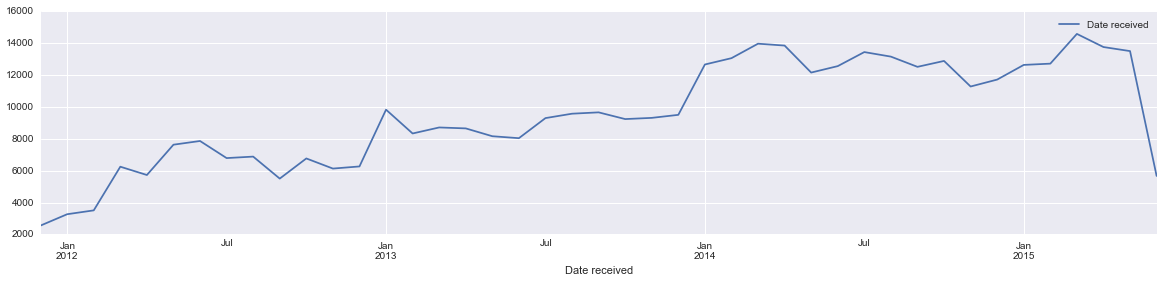

In [222]:
complaints[['Date received']].resample('M', how= "count").plot(figsize=(20,4))

#Number of Complaints by Product

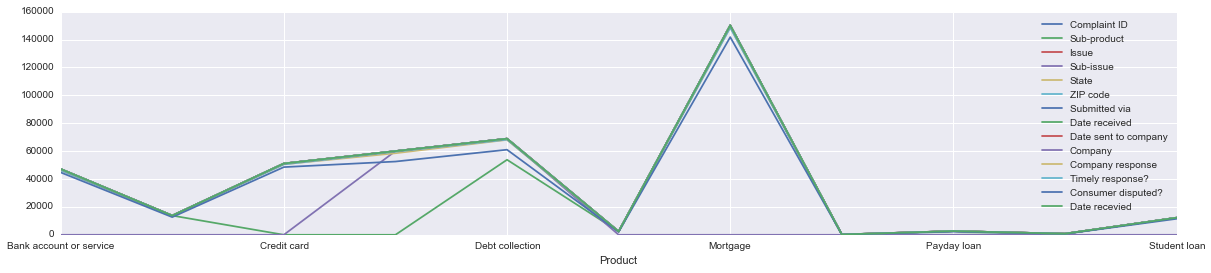

In [221]:
complaints_product = complaints.groupby("Product").count().plot(figsize=(20,4))

In [210]:
complaints_product

,Complaint ID,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,Date recevied
Product,,,,,,,,,,,,,,
Bank account or service,47166,47166,47162,0,46230,46305,47166,47166,47166,47166,47166,47166,44730,47166
Consumer loan,13771,13771,13769,0,13632,13609,13771,13771,13771,13771,13771,13771,12666,13771
Credit card,51103,0,51103,0,50548,50473,51103,51103,51103,51103,51103,51103,48529,51103
Credit reporting,60006,0,60006,60006,58475,59568,60006,60006,60006,60006,60006,60006,52516,60006
Debt collection,68907,53805,68907,68907,68065,68246,68907,68907,68907,68907,68907,68907,61004,68907
Money transfers,2383,2383,2383,0,2281,2323,2383,2383,2383,2383,2383,2383,2110,2383
Mortgage,150140,150140,150140,0,148819,148477,150140,150140,150140,150140,150140,150140,141705,150140
Other financial service,227,227,227,0,216,223,227,227,227,227,227,227,183,227
Payday loan,2655,0,2655,0,2590,2633,2655,2655,2655,2655,2655,2655,2276,2655


#Number of Complaints by Company ( Top 10 )

In [261]:
complaints_company = complaints.groupby("Company").count()#[::-1].plot(figsize=(25,10))

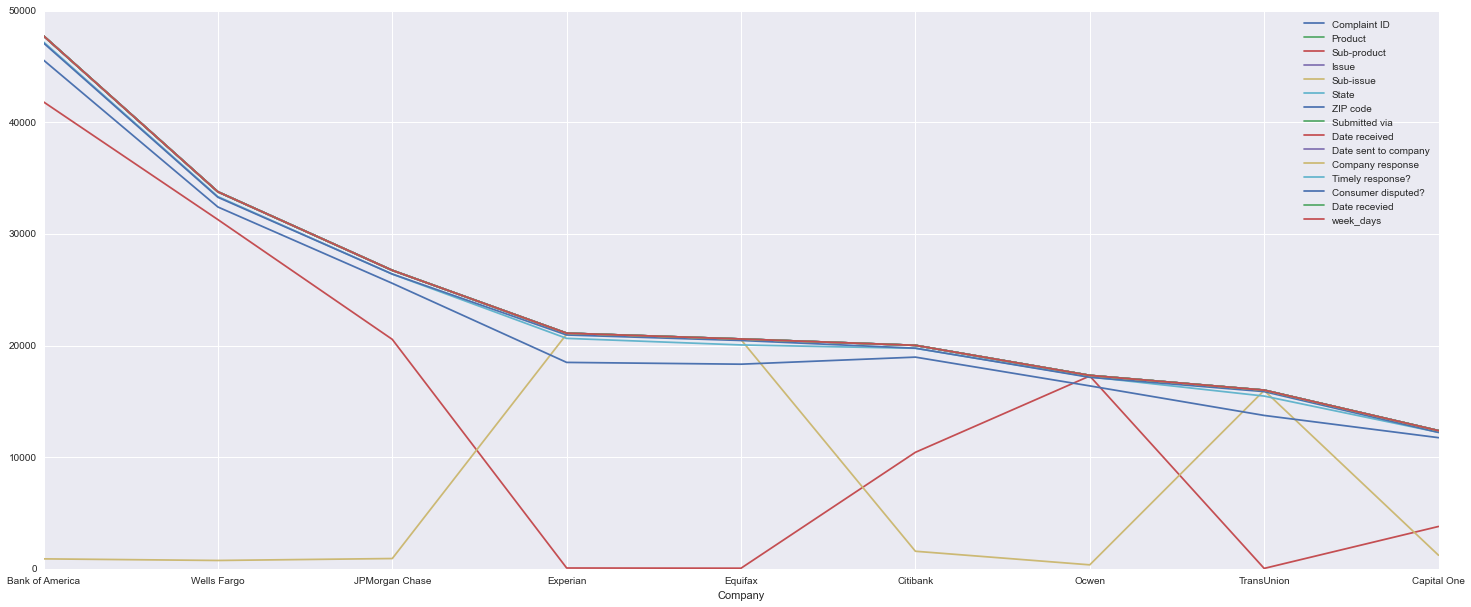

In [279]:
complaints_company.sort('Complaint ID')[:-10:-1].plot(figsize=(25, 10))

In [276]:
complaints_company.sort('Complaint ID')[:-10:-1]

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company response,Timely response?,Consumer disputed?,Date recevied,week_days
Company,,,,,,,,,,,,,,,
Bank of America,47753,47753,41837,47753,890,47204,47115,47753,47753,47753,47753,47753,45581,47753,47753
Wells Fargo,33781,33781,31289,33780,747,33349,33291,33781,33781,33781,33781,33781,32420,33781,33781
JPMorgan Chase,26745,26745,20558,26744,920,26405,26410,26745,26745,26745,26745,26745,25582,26745,26745
Experian,21112,21112,71,21112,21032,20647,20952,21112,21112,21112,21112,21112,18494,21112,21112
Equifax,20592,20592,53,20592,20527,20058,20459,20592,20592,20592,20592,20592,18334,20592,20592
Citibank,20024,20024,10438,20024,1572,19758,19768,20024,20024,20024,20024,20024,18967,20024,20024
Ocwen,17331,17331,17276,17331,355,17199,17159,17331,17331,17331,17331,17331,16390,17331,17331
TransUnion,16010,16010,35,16010,15982,15477,15879,16010,16010,16010,16010,16010,13743,16010,16010
Capital One,12378,12378,3793,12377,1216,12229,12221,12378,12378,12378,12378,12378,11750,12378,12378


#Number of Complanits by Company Response

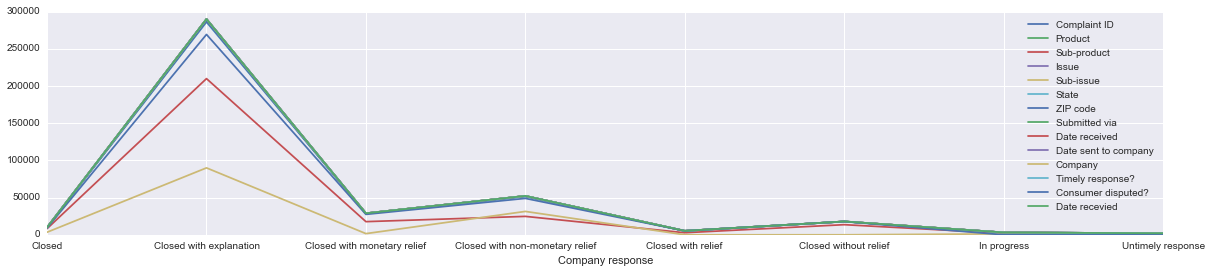

In [219]:
complaints_company_response = complaints.groupby("Company response").count().plot(figsize=(20,4))

In [216]:
complaints_company_response

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Timely response?,Consumer disputed?,Date recevied
Company response,,,,,,,,,,,,,,
Closed,9909,9909,8274,9909,3469,9749,9772,9909,9909,9909,9909,9909,9128,9909
Closed with explanation,289933,289933,209919,289929,89953,285923,286586,289933,289933,289933,289933,289933,269270,289933
Closed with monetary relief,28910,28910,17680,28908,1578,28563,28538,28910,28910,28910,28910,28910,27459,28910
Closed with non-monetary relief,52257,52257,24758,52257,31419,51340,51747,52257,52257,52257,52257,52257,48940,52257
Closed with relief,5305,5305,2784,5305,0,5261,5252,5305,5305,5305,5305,5305,5229,5305
Closed without relief,17909,17909,13600,17909,0,17807,17757,17909,17909,17909,17909,17909,17813,17909
In progress,3153,3153,2057,3153,1247,3119,3129,3153,3153,3153,3153,3153,0,3153
Untimely response,2024,2024,1462,2024,1247,1997,2002,2024,2024,2024,2024,2024,2,2024


#Mean number of Complaints by Day of Week

In [244]:
complaints['week_days'] = complaints.index.weekday

In [247]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 409400 entries, 2015-06-22 to 2011-12-01
Data columns (total 16 columns):
Complaint ID            409400 non-null object
Product                 409400 non-null object
Sub-product             280534 non-null object
Issue                   409394 non-null object
Sub-issue               128913 non-null object
State                   403759 non-null object
ZIP code                404783 non-null object
Submitted via           409400 non-null object
Date received           409400 non-null object
Date sent to company    409400 non-null object
Company                 409400 non-null object
Company response        409400 non-null object
Timely response?        409400 non-null object
Consumer disputed?      377841 non-null object
Date recevied           409400 non-null datetime64[ns]
week_days               409400 non-null int32
dtypes: datetime64[ns](1), int32(1), object(14)
memory usage: 51.5+ MB


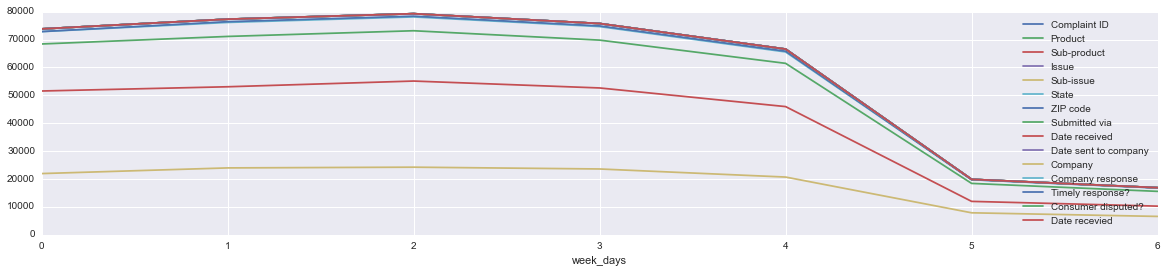

In [281]:
complaints.groupby("week_days").count().plot(figsize=(20, 4))